In [302]:
!wget "https://raw.githubusercontent.com/VineetSingla13/Amex_Analyze_This_2020/main/Training_Data_0611N.csv"
!wget "https://raw.githubusercontent.com/VineetSingla13/Amex_Analyze_This_2020/main/Evaluation_Data_0611_Nv.csv"

--2020-11-08 09:00:03--  https://raw.githubusercontent.com/VineetSingla13/Amex_Analyze_This_2020/main/Training_Data_0611N.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4516078 (4.3M) [text/plain]
Saving to: ‘Training_Data_0611N.csv.6’

Training_Data_0611N 100%[===================>]   4.31M  --.-KB/s    in 0.1s    

2020-11-08 09:00:03 (39.1 MB/s) - ‘Training_Data_0611N.csv.6’ saved [4516078/4516078]

--2020-11-08 09:00:03--  https://raw.githubusercontent.com/VineetSingla13/Amex_Analyze_This_2020/main/Evaluation_Data_0611_Nv.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request 

In [303]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import style
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
plt.ion()
style.use('ggplot')
from tqdm import tqdm

In [304]:
#import dataset
bank_dataset = pd.read_csv('Training_Data_0611N.csv',index_col = 'cust_id')
print(bank_dataset.shape)
# Removing NaN rows
bank_dataset=bank_dataset.dropna(subset=["profitable_flag"])

(19599, 49)


In [305]:
bank_dataset.shape

(19595, 49)

In [306]:
bank_dataset.head(50)

,profitable_flag,count_accts,cm_age,flag_top_ed_spender,flag_cust_fee_paid_6m,pre6m_cust_spend,pre6m_cust_roc_cnt,pre6m_cust_non_disc_amt,pre6m_cust_non_disc_cnt,pre6m_cust_disc_amt,pre6m_cust_disc_cnt,pre6m_cust_outbound_amt,pre6m_cust_online_amt,pre6m_cust_online_cnt,pre6m_cust_travel_amt,pre6m_cust_travel_cnt,pre6m_cust_retail_amt,pre6m_cust_retail_cnt,pre6m_cust_myca_active,pre6m_cust_mob_logins,pre6m_total_mc_trs,acq_sub_chn,acq_type_grp,fee_type_grp,Cust_tenure,pre6m_spend_active_ind,highly_utilized_ind,min_pay_ind,paid_in_full_ind,sum_total_line_amt,direct_debit_ind,referrals,spillover,self_accts,Customer Low Quality indicator,cdss_most_rcnt_prob,cust_max_credit_12m_amt,cust_max_remit_12m_amt,cbr_3_score,cnsumr_chrg_actv_cust_cnt,cnsumr_chrg_avg_credit_12m_amt,cnsumr_lend_actv_cust_cnt,cnsumr_lend_tot_util_ratio,sow_revol_avg_paydown_pct,sow_tot_annual_ext_pmt_amt,sow_tot_revol_bal_amt,sow_tot_revol_cnt,sow_tot_trans_bal_amt,sow_tot_trans_cnt
cust_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
550391.0,0.0,1.0,74.0,1.0,0.0,"1,518",122.0,811,96.0,707,26.0,-,606,36.0,28,2.0,814,98.0,9.0,203.0,(2),Unreferred,external,no_fee,63.0,1.0,0.0,0.0,1.0,"80,000",1.0,1.0,0.0,0.0,0.0,0.000,482,418,1376.0,0.0,-,1.0,0.034044,0.0000,991,-,0.0,-,3.0
550392.0,0.0,1.0,64.0,0.0,0.0,"4,807",354.0,"1,052",82.0,"3,756",272.0,673,"3,164",456.0,"2,291",44.0,"1,265",116.0,0.0,0.0,15,In House,others,no_fee,203.0,1.0,0.0,0.0,1.0,"140,000",1.0,1.0,1.0,0.0,0.0,0.000,"2,165","2,165",1300.0,0.0,7,1.0,0.044086,0.0877,2,24,2.0,-,0.0
550393.0,0.0,1.0,75.0,1.0,0.0,"2,361",204.0,"1,351",118.0,"1,010",86.0,237,693,152.0,-,0.0,"1,623",166.0,9.0,18.0,(20),NaN,NaN,full_fee,201.0,1.0,0.0,0.0,1.0,"32,800",0.0,0.0,0.0,0.0,0.0,0.000,703,687,1376.0,0.0,-,1.0,0.039613,0.0000,"4,828",-,0.0,387,3.0
550394.0,0.0,2.0,73.0,0.0,1.0,"5,452",142.0,"1,195",50.0,"4,257",92.0,803,"1,618",64.0,"2,760",54.0,"1,605",54.0,9.0,23.0,30,NaN,NaN,full_fee,286.0,1.0,0.0,0.0,1.0,"100,000",1.0,0.0,0.0,0.0,0.0,0.000,"1,225","1,225",1372.0,1.0,493,1.0,0.001200,0.0000,"4,598",-,0.0,295,4.0
550395.0,0.0,2.0,68.0,0.0,0.0,170,34.0,88,20.0,82,14.0,10,10,4.0,-,0.0,66,18.0,0.0,0.0,(9),Affiliates,spillover,no_fee,123.0,1.0,0.0,0.0,1.0,"20,800",1.0,0.0,0.0,0.0,0.0,0.001,51,35,1338.0,0.0,-,2.0,0.003378,0.0168,"2,176","2,606",5.0,143,13.0
550396.0,0.0,2.0,73.0,1.0,1.0,"46,428",644.0,"5,108",116.0,"41,323",528.0,"12,620","28,522",820.0,"8,155",108.0,"34,480",460.0,0.0,0.0,"1,146",NaN,NaN,full_fee,179.0,1.0,0.0,0.0,1.0,"149,600",1.0,0.0,0.0,0.0,0.0,0.000,"11,555","11,555",1255.0,0.0,-,1.0,0.207708,0.0000,-,-,0.0,-,0.0
550397.0,0.0,2.0,69.0,1.0,1.0,"12,431",442.0,"5,679",232.0,"6,753",210.0,608,"4,205",248.0,"2,801",56.0,"8,376",330.0,13.0,27.0,(75),Unreferred,spillover,full_fee,280.0,1.0,0.0,0.0,1.0,"58,800",1.0,0.0,0.0,0.0,0.0,0.000,"3,316","3,316",1255.0,1.0,19,1.0,0.064085,0.3565,"2,967",441,2.0,"1,866",2.0
550398.0,1.0,2.0,58.0,0.0,0.0,"22,606",472.0,"10,796",182.0,"11,812",290.0,332,"4,155",352.0,"1,673",80.0,"17,909",312.0,15.0,93.0,(48),Affiliates,spillover,full_fee,219.0,1.0,0.0,0.0,1.0,"140,000",0.0,0.0,0.0,0.0,0.0,0.001,"6,503","6,287",1239.0,0.0,-,2.0,0.143371,0.0000,"73,575",-,0.0,"5,833",6.0
550399.0,0.0,2.0,71.0,0.0,1.0,"3,127",116.0,"1,090",58.0,"2,037",58.0,25,14,4.0,293,4.0,"1,949",102.0,3.0,3.0,2,NaN,NaN,full_fee,461.0,1.0,0.0,0.0,0.0,-,1.0,0.0,0.0,0.0,0.0,0.000,"1,267","1,267",1281.0,2.0,482,0.0,0.000000,0.0000,-,-,0.0,-,0.0


In [307]:
bank_dataset.shape

(19595, 49)

In [308]:
#bank_dataset.dropna(subset=["profitable_flag"])
bank_dataset.shape

(19595, 49)

In [309]:
#the columns which need to be converted to float
bank_float_dataset = bank_dataset[[i for i in bank_dataset.columns if i not in ['acq_sub_chn','acq_type_grp','fee_type_grp']]]
bank_string_dataset = bank_dataset[[i for i in bank_dataset.columns if i in ['acq_type_grp','fee_type_grp']]]

In [310]:
bank_float_dataset

,profitable_flag,count_accts,cm_age,flag_top_ed_spender,flag_cust_fee_paid_6m,pre6m_cust_spend,pre6m_cust_roc_cnt,pre6m_cust_non_disc_amt,pre6m_cust_non_disc_cnt,pre6m_cust_disc_amt,pre6m_cust_disc_cnt,pre6m_cust_outbound_amt,pre6m_cust_online_amt,pre6m_cust_online_cnt,pre6m_cust_travel_amt,pre6m_cust_travel_cnt,pre6m_cust_retail_amt,pre6m_cust_retail_cnt,pre6m_cust_myca_active,pre6m_cust_mob_logins,pre6m_total_mc_trs,Cust_tenure,pre6m_spend_active_ind,highly_utilized_ind,min_pay_ind,paid_in_full_ind,sum_total_line_amt,direct_debit_ind,referrals,spillover,self_accts,Customer Low Quality indicator,cdss_most_rcnt_prob,cust_max_credit_12m_amt,cust_max_remit_12m_amt,cbr_3_score,cnsumr_chrg_actv_cust_cnt,cnsumr_chrg_avg_credit_12m_amt,cnsumr_lend_actv_cust_cnt,cnsumr_lend_tot_util_ratio,sow_revol_avg_paydown_pct,sow_tot_annual_ext_pmt_amt,sow_tot_revol_bal_amt,sow_tot_revol_cnt,sow_tot_trans_bal_amt,sow_tot_trans_cnt
cust_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
550391.0,0.0,1.0,74.0,1.0,0.0,"1,518",122.0,811,96.0,707,26.0,-,606,36.0,28,2.0,814,98.0,9.0,203.0,(2),63.0,1.0,0.0,0.0,1.0,"80,000",1.0,1.0,0.0,0.0,0.0,0.000,482,418,1376.0,0.0,-,1.0,0.034044,0.0000,991,-,0.0,-,3.0
550392.0,0.0,1.0,64.0,0.0,0.0,"4,807",354.0,"1,052",82.0,"3,756",272.0,673,"3,164",456.0,"2,291",44.0,"1,265",116.0,0.0,0.0,15,203.0,1.0,0.0,0.0,1.0,"140,000",1.0,1.0,1.0,0.0,0.0,0.000,"2,165","2,165",1300.0,0.0,7,1.0,0.044086,0.0877,2,24,2.0,-,0.0
550393.0,0.0,1.0,75.0,1.0,0.0,"2,361",204.0,"1,351",118.0,"1,010",86.0,237,693,152.0,-,0.0,"1,623",166.0,9.0,18.0,(20),201.0,1.0,0.0,0.0,1.0,"32,800",0.0,0.0,0.0,0.0,0.0,0.000,703,687,1376.0,0.0,-,1.0,0.039613,0.0000,"4,828",-,0.0,387,3.0
550394.0,0.0,2.0,73.0,0.0,1.0,"5,452",142.0,"1,195",50.0,"4,257",92.0,803,"1,618",64.0,"2,760",54.0,"1,605",54.0,9.0,23.0,30,286.0,1.0,0.0,0.0,1.0,"100,000",1.0,0.0,0.0,0.0,0.0,0.000,"1,225","1,225",1372.0,1.0,493,1.0,0.001200,0.0000,"4,598",-,0.0,295,4.0
550395.0,0.0,2.0,68.0,0.0,0.0,170,34.0,88,20.0,82,14.0,10,10,4.0,-,0.0,66,18.0,0.0,0.0,(9),123.0,1.0,0.0,0.0,1.0,"20,800",1.0,0.0,0.0,0.0,0.0,0.001,51,35,1338.0,0.0,-,2.0,0.003378,0.0168,"2,176","2,606",5.0,143,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569981.0,1.0,1.0,33.0,0.0,0.0,"3,667",422.0,"1,730",144.0,"1,938",278.0,359,969,292.0,170,2.0,"1,593",224.0,5.0,5.0,(16),18.0,1.0,0.0,0.0,1.0,"25,333",1.0,0.0,0.0,0.0,0.0,0.000,"1,799","1,799",1239.0,0.0,-,1.0,0.028450,0.0000,-,-,0.0,-,0.0
569982.0,0.0,1.0,71.0,0.0,0.0,"2,441",118.0,973,86.0,"1,468",32.0,"1,274",-,0.0,13,6.0,973,86.0,6.0,16.0,49,5.0,1.0,0.0,0.0,0.0,"40,000",0.0,0.0,0.0,0.0,0.0,0.007,"1,683",83,1137.0,0.0,-,1.0,0.175549,0.0156,692,"3,547",2.0,-,0.0
569983.0,0.0,1.0,48.0,1.0,0.0,"1,387",76.0,169,32.0,"1,219",44.0,-,"1,011",4.0,"1,086",28.0,209,34.0,4.0,14.0,(26),1.0,0.0,0.0,0.0,0.0,"6,667",0.0,0.0,0.0,0.0,0.0,0.004,-,-,1027.0,0.0,-,1.0,0.215851,0.0000,-,-,0.0,-,0.0


In [311]:
#convert string to float
bank_float_dataset = bank_float_dataset.replace({',':''},regex=True)
bank_float_dataset = bank_float_dataset.replace({'-':''},regex=True)
bank_float_dataset = bank_float_dataset.replace({' ':''},regex=True)
bank_float_dataset = bank_float_dataset.replace({'\(':''},regex=True)
bank_float_dataset = bank_float_dataset.replace({'\)':''},regex=True)
bank_float_dataset =bank_float_dataset.apply(pd.to_numeric)
bank_float_dataset.head()

,profitable_flag,count_accts,cm_age,flag_top_ed_spender,flag_cust_fee_paid_6m,pre6m_cust_spend,pre6m_cust_roc_cnt,pre6m_cust_non_disc_amt,pre6m_cust_non_disc_cnt,pre6m_cust_disc_amt,pre6m_cust_disc_cnt,pre6m_cust_outbound_amt,pre6m_cust_online_amt,pre6m_cust_online_cnt,pre6m_cust_travel_amt,pre6m_cust_travel_cnt,pre6m_cust_retail_amt,pre6m_cust_retail_cnt,pre6m_cust_myca_active,pre6m_cust_mob_logins,pre6m_total_mc_trs,Cust_tenure,pre6m_spend_active_ind,highly_utilized_ind,min_pay_ind,paid_in_full_ind,sum_total_line_amt,direct_debit_ind,referrals,spillover,self_accts,Customer Low Quality indicator,cdss_most_rcnt_prob,cust_max_credit_12m_amt,cust_max_remit_12m_amt,cbr_3_score,cnsumr_chrg_actv_cust_cnt,cnsumr_chrg_avg_credit_12m_amt,cnsumr_lend_actv_cust_cnt,cnsumr_lend_tot_util_ratio,sow_revol_avg_paydown_pct,sow_tot_annual_ext_pmt_amt,sow_tot_revol_bal_amt,sow_tot_revol_cnt,sow_tot_trans_bal_amt,sow_tot_trans_cnt
cust_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
550391.0,0.0,1.0,74.0,1.0,0.0,1518.0,122.0,811.0,96.0,707.0,26.0,NaN,606.0,36.0,28.0,2.0,814.0,98.0,9.0,203.0,2,63.0,1.0,0.0,0.0,1.0,80000.0,1.0,1.0,0.0,0.0,0.0,0.000,482.0,418.0,1376.0,0.0,NaN,1.0,0.034044,0.0000,991.0,NaN,0.0,NaN,3.0
550392.0,0.0,1.0,64.0,0.0,0.0,4807.0,354.0,1052.0,82.0,3756.0,272.0,673.0,3164.0,456.0,2291.0,44.0,1265.0,116.0,0.0,0.0,15,203.0,1.0,0.0,0.0,1.0,140000.0,1.0,1.0,1.0,0.0,0.0,0.000,2165.0,2165.0,1300.0,0.0,7.0,1.0,0.044086,0.0877,2.0,24.0,2.0,NaN,0.0
550393.0,0.0,1.0,75.0,1.0,0.0,2361.0,204.0,1351.0,118.0,1010.0,86.0,237.0,693.0,152.0,NaN,0.0,1623.0,166.0,9.0,18.0,20,201.0,1.0,0.0,0.0,1.0,32800.0,0.0,0.0,0.0,0.0,0.0,0.000,703.0,687.0,1376.0,0.0,NaN,1.0,0.039613,0.0000,4828.0,NaN,0.0,387.0,3.0
550394.0,0.0,2.0,73.0,0.0,1.0,5452.0,142.0,1195.0,50.0,4257.0,92.0,803.0,1618.0,64.0,2760.0,54.0,1605.0,54.0,9.0,23.0,30,286.0,1.0,0.0,0.0,1.0,100000.0,1.0,0.0,0.0,0.0,0.0,0.000,1225.0,1225.0,1372.0,1.0,493.0,1.0,0.001200,0.0000,4598.0,NaN,0.0,295.0,4.0
550395.0,0.0,2.0,68.0,0.0,0.0,170.0,34.0,88.0,20.0,82.0,14.0,10.0,10.0,4.0,NaN,0.0,66.0,18.0,0.0,0.0,9,123.0,1.0,0.0,0.0,1.0,20800.0,1.0,0.0,0.0,0.0,0.0,0.001,51.0,35.0,1338.0,0.0,NaN,2.0,0.003378,0.0168,2176.0,2606.0,5.0,143.0,13.0


In [312]:
bank_float_dataset.dtypes

profitable_flag                   float64
count_accts                       float64
cm_age                            float64
flag_top_ed_spender               float64
flag_cust_fee_paid_6m             float64
pre6m_cust_spend                  float64
pre6m_cust_roc_cnt                float64
pre6m_cust_non_disc_amt           float64
pre6m_cust_non_disc_cnt           float64
pre6m_cust_disc_amt               float64
pre6m_cust_disc_cnt               float64
pre6m_cust_outbound_amt           float64
pre6m_cust_online_amt             float64
pre6m_cust_online_cnt             float64
pre6m_cust_travel_amt             float64
pre6m_cust_travel_cnt             float64
pre6m_cust_retail_amt             float64
pre6m_cust_retail_cnt             float64
pre6m_cust_myca_active            float64
pre6m_cust_mob_logins             float64
pre6m_total_mc_trs                  int64
Cust_tenure                       float64
pre6m_spend_active_ind            float64
highly_utilized_ind               

In [313]:
#correlation matrix
bank_float_dataset_matrix = bank_float_dataset.corr()
bank_float_dataset_matrix.style.background_gradient(cmap='coolwarm')

,profitable_flag,count_accts,cm_age,flag_top_ed_spender,flag_cust_fee_paid_6m,pre6m_cust_spend,pre6m_cust_roc_cnt,pre6m_cust_non_disc_amt,pre6m_cust_non_disc_cnt,pre6m_cust_disc_amt,pre6m_cust_disc_cnt,pre6m_cust_outbound_amt,pre6m_cust_online_amt,pre6m_cust_online_cnt,pre6m_cust_travel_amt,pre6m_cust_travel_cnt,pre6m_cust_retail_amt,pre6m_cust_retail_cnt,pre6m_cust_myca_active,pre6m_cust_mob_logins,pre6m_total_mc_trs,Cust_tenure,pre6m_spend_active_ind,highly_utilized_ind,min_pay_ind,paid_in_full_ind,sum_total_line_amt,direct_debit_ind,referrals,spillover,self_accts,Customer Low Quality indicator,cdss_most_rcnt_prob,cust_max_credit_12m_amt,cust_max_remit_12m_amt,cbr_3_score,cnsumr_chrg_actv_cust_cnt,cnsumr_chrg_avg_credit_12m_amt,cnsumr_lend_actv_cust_cnt,cnsumr_lend_tot_util_ratio,sow_revol_avg_paydown_pct,sow_tot_annual_ext_pmt_amt,sow_tot_revol_bal_amt,sow_tot_revol_cnt,sow_tot_trans_bal_amt,sow_tot_trans_cnt
profitable_flag,1.000000,-0.018371,-0.009669,0.045338,-0.014153,0.121448,0.096348,0.088776,0.077625,0.110766,0.087323,0.080756,0.080698,0.043151,0.098345,0.112781,0.088673,0.045425,0.017608,-0.005772,0.052265,0.026220,0.038838,0.001841,-0.026931,0.014042,0.063663,0.030059,-0.025317,-0.038067,-0.033090,-0.028062,-0.032799,0.099795,0.100329,0.030169,0.016858,0.158904,-0.035913,0.012976,-0.017806,0.042136,0.037572,-0.015264,0.028744,-0.004548
count_accts,-0.018371,1.000000,0.059390,0.055396,0.233922,0.197679,0.125151,0.136837,0.132271,0.181690,0.104214,0.140894,0.160401,0.070472,0.129282,0.103671,0.151130,0.074694,0.601990,0.334195,0.220562,0.220175,0.095301,0.058736,0.145992,0.157105,0.376644,0.081948,0.202146,0.291064,0.241411,0.143320,0.048798,0.162825,0.154856,0.083504,0.341169,0.017189,0.696986,-0.026153,0.050543,0.104955,0.112445,0.107743,0.090687,0.177667
cm_age,-0.009669,0.059390,1.000000,-0.022777,0.088667,0.134851,-0.067719,0.202401,0.036535,0.100300,-0.088075,0.082611,0.077666,0.002964,0.170938,-0.170853,0.125325,0.023566,0.141355,0.036489,0.084132,0.387452,0.015638,-0.016707,0.001084,0.119177,0.275213,0.017081,-0.010856,0.035477,0.008714,0.031859,-0.040942,0.163190,0.169491,0.109619,-0.018088,0.041707,0.068626,0.004467,0.048302,0.149019,0.218996,0.099642,0.136301,0.257321
flag_top_ed_spender,0.045338,0.055396,-0.022777,1.000000,0.081932,0.120647,0.284623,0.173695,0.438435,0.083399,0.196663,0.034846,0.067627,0.068099,0.057140,0.217096,0.088824,0.177554,0.077936,0.036256,0.000786,0.068095,0.061907,-0.057372,-0.045218,0.076419,0.133331,0.070471,0.007188,0.002950,0.010062,0.010567,-0.098287,0.081946,0.081485,0.057385,0.029043,0.051413,0.031444,-0.044718,-0.026253,-0.002901,0.049646,-0.034808,-0.007682,0.025106
flag_cust_fee_paid_6m,-0.014153,0.233922,0.088667,0.081932,1.000000,0.206153,0.147636,0.158183,0.134222,0.184847,0.129331,0.137219,0.155214,0.081396,0.163072,0.134414,0.148679,0.082622,0.216699,0.117889,0.269396,0.139173,0.134658,0.013739,0.007863,-0.009374,0.239460,0.073796,0.084229,0.129425,0.102117,0.069183,0.012002,0.202980,0.198681,0.076054,0.380336,0.108680,-0.061728,0.004149,0.039975,0.100904,0.130330,0.078640,0.095697,0.071479
pre6m_cust_spend,0.121448,0.197679,0.134851,0.120647,0.206153,1.000000,0.483718,0.537805,0.283584,0.973507,0.467951,0.661629,0.821954,0.418656,0.593768,0.297956,0.805975,0.397014,0.248992,0.122832,0.606359,0.247662,0.128692,0.105652,-0.021406,0.085162,0.413020,0.056400,0.038884,0.045117,-0.003293,0.031820,-0.033943,0.793757,0.799298,0.089312,0.150627,0.569700,0.038846,0.096694,0.033789,0.377771,0.186828,0.064322,0.239078,0.113564
pre6m_cust_roc_cnt,0.096348,0.125151,-0.067719,0.284623,0.147636,0.483718,1.000000,0.364958,0.584062,0.462021,0.971288,0.336115,0.489719,0.822616,0.216332,0.572392,0.483539,0.885109,0.198619,0.085143,0.253247,0.129966,0.214263,0.024254,-0.030543,0.143770,0.297551,0.098121,0.033615,0.014220,-0.002715,0.010718,-0.057150,0.333617,0.328884,0.158917,0.122994,0.143730,0.025856,0.035927,0.005563,0.032807,0.106720,0.022383,-0.006755,0.046169
pre6m_cust_non_dis

In [314]:
high_corr_var=np.where(bank_float_dataset_matrix>0.8)
high_corr_var=[(bank_float_dataset_matrix.index[x],bank_float_dataset_matrix.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]

In [315]:
high_corr_var

[('pre6m_cust_spend', 'pre6m_cust_disc_amt'),
 ('pre6m_cust_spend', 'pre6m_cust_online_amt'),
 ('pre6m_cust_spend', 'pre6m_cust_retail_amt'),
 ('pre6m_cust_roc_cnt', 'pre6m_cust_disc_cnt'),
 ('pre6m_cust_roc_cnt', 'pre6m_cust_online_cnt'),
 ('pre6m_cust_roc_cnt', 'pre6m_cust_retail_cnt'),
 ('pre6m_cust_disc_amt', 'pre6m_cust_online_amt'),
 ('pre6m_cust_disc_cnt', 'pre6m_cust_online_cnt'),
 ('pre6m_cust_disc_cnt', 'pre6m_cust_retail_cnt'),
 ('pre6m_cust_online_cnt', 'pre6m_cust_retail_cnt'),
 ('referrals', 'spillover'),
 ('cust_max_credit_12m_amt', 'cust_max_remit_12m_amt')]

In [316]:
len(bank_float_dataset.columns)

46

In [317]:
high_corr_columns= ['pre6m_cust_disc_amt','pre6m_cust_online_amt','pre6m_cust_retail_amt','pre6m_cust_disc_cnt','pre6m_cust_online_cnt','pre6m_cust_retail_cnt','spillover','cust_max_remit_12m_amt']
len(high_corr_columns)

8

In [318]:
bank_float_dataset = bank_float_dataset.drop(high_corr_columns,axis=1)

In [319]:
len(bank_float_dataset.columns)

38

In [320]:

#impute the missing data
from sklearn.impute import KNNImputer
#from sklearn_pandas import CategoricalImputer
from sklearn.impute import SimpleImputer
mean_imputer = SimpleImputer(strategy = 'mean')
freq_imputer = SimpleImputer(strategy = 'most_frequent')
knn_imputer = KNNImputer(n_neighbors=2, weights="uniform")
bank_float_dataset_num = knn_imputer.fit_transform(bank_float_dataset)
bank_string_dataset_num = freq_imputer.fit_transform(bank_string_dataset)


In [321]:

bank_float_dataset = pd.DataFrame(data=bank_float_dataset_num, index=bank_float_dataset.index.tolist(), columns=bank_float_dataset.columns)
bank_string_dataset = pd.DataFrame(data=bank_string_dataset_num, index=bank_string_dataset.index.tolist(), columns=bank_string_dataset.columns)


In [322]:
bank_string_dataset 

,acq_type_grp,fee_type_grp
550391.0,external,no_fee
550392.0,others,no_fee
550393.0,external,full_fee
550394.0,external,full_fee
550395.0,spillover,no_fee
...,...,...
569981.0,external,no_fee
569982.0,external,no_fee
569983.0,external,full_fee
569984.0,external,no_fee


In [323]:
bank_string_dataset = pd.get_dummies(bank_string_dataset, prefix_sep= '_', columns=['acq_type_grp','fee_type_grp'], drop_first = True)

In [324]:
bank_string_dataset

,acq_type_grp_others,acq_type_grp_spillover,fee_type_grp_no_fee,fee_type_grp_reduced_fee,fee_type_grp_unknown
550391.0,0,0,1,0,0
550392.0,1,0,1,0,0
550393.0,0,0,0,0,0
550394.0,0,0,0,0,0
550395.0,0,1,1,0,0
...,...,...,...,...,...
569981.0,0,0,1,0,0
569982.0,0,0,1,0,0
569983.0,0,0,0,0,0
569984.0,0,0,1,0,0


#Feature Scaling

In [325]:
#No need to scale output column
output_dataset = bank_float_dataset['profitable_flag']
bank_float_dataset = bank_float_dataset.drop('profitable_flag',axis=1)

In [326]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
scaled_df = scaler.fit_transform(bank_float_dataset)

In [327]:
bank_float_dataset = pd.DataFrame(data=scaled_df, index=bank_float_dataset.index.tolist(), columns=bank_float_dataset.columns)

In [328]:
bank_float_dataset.head(50)

,count_accts,cm_age,flag_top_ed_spender,flag_cust_fee_paid_6m,pre6m_cust_spend,pre6m_cust_roc_cnt,pre6m_cust_non_disc_amt,pre6m_cust_non_disc_cnt,pre6m_cust_outbound_amt,pre6m_cust_travel_amt,pre6m_cust_travel_cnt,pre6m_cust_myca_active,pre6m_cust_mob_logins,pre6m_total_mc_trs,Cust_tenure,pre6m_spend_active_ind,highly_utilized_ind,min_pay_ind,paid_in_full_ind,sum_total_line_amt,direct_debit_ind,referrals,self_accts,Customer Low Quality indicator,cdss_most_rcnt_prob,cust_max_credit_12m_amt,cbr_3_score,cnsumr_chrg_actv_cust_cnt,cnsumr_chrg_avg_credit_12m_amt,cnsumr_lend_actv_cust_cnt,cnsumr_lend_tot_util_ratio,sow_revol_avg_paydown_pct,sow_tot_annual_ext_pmt_amt,sow_tot_revol_bal_amt,sow_tot_revol_cnt,sow_tot_trans_bal_amt,sow_tot_trans_cnt
550391.0,0.0,0.666667,1.0,0.0,0.004924,0.002476,0.014494,0.076190,0.001578,0.000358,0.001105,0.272727,0.026557,0.000542,0.112933,1.0,0.0,0.0,1.0,0.211337,1.0,0.004255,0.000000,0.0,0.000000,0.007707,0.967651,0.0,0.008527,0.2,0.543346,0.000000,0.002221,0.009207,0.0,0.011803,0.230769
550392.0,0.0,0.533333,0.0,0.0,0.015594,0.007186,0.018801,0.065079,0.007454,0.029332,0.024309,0.000000,0.000000,0.004066,0.367942,1.0,0.0,0.0,1.0,0.370770,1.0,0.004255,0.000000,0.0,0.000000,0.034619,0.914205,0.0,0.000297,0.2,0.544325,0.175928,0.000004,0.000640,0.2,0.000623,0.000000
550393.0,0.0,0.680000,1.0,0.0,0.007659,0.004141,0.024145,0.093651,0.002625,0.003803,0.000000,0.272727,0.002355,0.005422,0.364299,1.0,0.0,0.0,1.0,0.085916,0.0,0.000000,0.000000,0.0,0.000000,0.011241,0.967651,0.0,0.014444,0.2,0.543889,0.000000,0.010819,0.057456,0.0,0.020079,0.230769
550394.0,0.2,0.653333,0.0,1.0,0.017686,0.002882,0.021357,0.039683,0.008894,0.035337,0.029834,0.272727,0.003009,0.008132,0.519126,1.0,0.0,0.0,1.0,0.264481,1.0,0.000000,0.000000,0.0,0.000000,0.019588,0.964838,0.5,0.020914,0.2,0.540145,0.000000,0.010304,0.049757,0.0,0.015306,0.307692
550395.0,0.2,0.586667,0.0,0.0,0.000551,0.000690,0.001573,0.015873,0.000111,0.000871,0.000000,0.000000,0.000000,0.002440,0.222222,1.0,0.0,0.0,1.0,0.054029,1.0,0.000000,0.000000,0.0,0.001003,0.000816,0.940928,0.0,0.001485,0.4,0.540357,0.033701,0.004876,0.069545,0.5,0.007419,1.000000
550396.0,0.2,0.653333,1.0,1.0,0.150614,0.013072,0.091291,0.092063,0.139784,0.104411,0.059669,0.000000,0.000000,0.310653,0.324226,1.0,0.0,0.0,1.0,0.396279,1.0,0.000000,0.000000,0.0,0.000000,0.184768,0.882560,0.0,0.014381,0.2,0.560274,0.000000,0.002963,0.021243,0.0,0.016343,0.000000
550397.0,0.2,0.600000,1.0,1.0,0.040327,0.008972,0.101496,0.184127,0.006734,0.035862,0.030939,0.393939,0.003532,0.020331,0.508197,1.0,0.0,0.0,1.0,0.155004,1.0,0.000000,0.000000,0.0,0.000000,0.053024,0.882560,0.5,0.000806,0.2,0.546274,0.715145,0.006649,0.011769,0.2,0.096814,0.153846
550398.0,0.2,0.453333,0.0,0.0,0.073335,0.009581,0.192948,0.144444,0.003677,0.021420,0.044199,0.454545,0.012166,0.013012,0.397086,1.0,0.0,0.0,1.0,0.370770,0.0,0.000000,0.000000,0.0,0.001003,0.103985,0.871308,0.0,0.048042,0.4,0.554003,0.000000,0.164880,0.039590,0.0,0.302636,0.461538
550399.0,0.2,0.626667,0.0,1.0,0.010144,0.002355,0.019481,0.046032,0.000277,0.003751,0.002210,0.090909,0.000392,0.000542,0.837887,1.0,0.0,0.0,0.0,0.107705,1.0,0.000000,0.000000,0.0,0.000000,0.020260,0.900844,1.0,0.020447,0.0,0.540028,0.000000,0.026364,0.136862,0.0,0.069135,0.000000
550400.0,0.0,0.586667,0.0,1.0,0.008986,0.005237,0.016103,0.071429,0.006834,0.011433,0.014365,0.151515,0.000654,0.050149,0.508197,1.0,0.0,0.0,0.0,0.188750,1.0,0.000000,0.000000,0.0,0.000000,0.013288,0.967651,0.5,0.017859,0.0,0.540028,0.000000,0.000020,0.005137,0.0,0.000078,0.153846


In [329]:
print(bank_float_dataset.shape)
print(bank_string_dataset.shape)
print(output_dataset.shape)

(19595, 37)
(19595, 5)
(19595,)


In [330]:
#join both the dataset
bank_dataset_conc = pd.concat([bank_float_dataset, bank_string_dataset], axis=1, sort=False)

In [331]:
bank_dataset_conc

,count_accts,cm_age,flag_top_ed_spender,flag_cust_fee_paid_6m,pre6m_cust_spend,pre6m_cust_roc_cnt,pre6m_cust_non_disc_amt,pre6m_cust_non_disc_cnt,pre6m_cust_outbound_amt,pre6m_cust_travel_amt,pre6m_cust_travel_cnt,pre6m_cust_myca_active,pre6m_cust_mob_logins,pre6m_total_mc_trs,Cust_tenure,pre6m_spend_active_ind,highly_utilized_ind,min_pay_ind,paid_in_full_ind,sum_total_line_amt,direct_debit_ind,referrals,self_accts,Customer Low Quality indicator,cdss_most_rcnt_prob,cust_max_credit_12m_amt,cbr_3_score,cnsumr_chrg_actv_cust_cnt,cnsumr_chrg_avg_credit_12m_amt,cnsumr_lend_actv_cust_cnt,cnsumr_lend_tot_util_ratio,sow_revol_avg_paydown_pct,sow_tot_annual_ext_pmt_amt,sow_tot_revol_bal_amt,sow_tot_revol_cnt,sow_tot_trans_bal_amt,sow_tot_trans_cnt,acq_type_grp_others,acq_type_grp_spillover,fee_type_grp_no_fee,fee_type_grp_reduced_fee,fee_type_grp_unknown
550391.0,0.0,0.666667,1.0,0.0,0.004924,0.002476,0.014494,0.076190,0.001578,0.000358,0.001105,0.272727,0.026557,0.000542,0.112933,1.0,0.0,0.0,1.0,0.211337,1.0,0.004255,0.0,0.0,0.000000,0.007707,0.967651,0.0,0.008527,0.2,0.543346,0.000000,0.002221,0.009207,0.0,0.011803,0.230769,0,0,1,0,0
550392.0,0.0,0.533333,0.0,0.0,0.015594,0.007186,0.018801,0.065079,0.007454,0.029332,0.024309,0.000000,0.000000,0.004066,0.367942,1.0,0.0,0.0,1.0,0.370770,1.0,0.004255,0.0,0.0,0.000000,0.034619,0.914205,0.0,0.000297,0.2,0.544325,0.175928,0.000004,0.000640,0.2,0.000623,0.000000,1,0,1,0,0
550393.0,0.0,0.680000,1.0,0.0,0.007659,0.004141,0.024145,0.093651,0.002625,0.003803,0.000000,0.272727,0.002355,0.005422,0.364299,1.0,0.0,0.0,1.0,0.085916,0.0,0.000000,0.0,0.0,0.000000,0.011241,0.967651,0.0,0.014444,0.2,0.543889,0.000000,0.010819,0.057456,0.0,0.020079,0.230769,0,0,0,0,0
550394.0,0.2,0.653333,0.0,1.0,0.017686,0.002882,0.021357,0.039683,0.008894,0.035337,0.029834,0.272727,0.003009,0.008132,0.519126,1.0,0.0,0.0,1.0,0.264481,1.0,0.000000,0.0,0.0,0.000000,0.019588,0.964838,0.5,0.020914,0.2,0.540145,0.000000,0.010304,0.049757,0.0,0.015306,0.307692,0,0,0,0,0
550395.0,0.2,0.586667,0.0,0.0,0.000551,0.000690,0.001573,0.015873,0.000111,0.000871,0.000000,0.000000,0.000000,0.002440,0.222222,1.0,0.0,0.0,1.0,0.054029,1.0,0.000000,0.0,0.0,0.001003,0.000816,0.940928,0.0,0.001485,0.4,0.540357,0.033701,0.004876,0.069545,0.5,0.007419,1.000000,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569981.0,0.0,0.120000,0.0,0.0,0.011896,0.008566,0.030919,0.114286,0.003976,0.002177,0.001105,0.151515,0.000654,0.004337,0.030965,1.0,0.0,0.0,1.0,0.066074,1.0,0.000000,0.0,0.0,0.000000,0.028767,0.871308,0.0,0.014954,0.2,0.542801,0.000000,0.008508,0.049010,0.0,0.001349,0.000000,0,0,1,0,0
569982.0,0.0,0.626667,0.0,0.0,0.007919,0.002395,0.017390,0.068254,0.014111,0.000166,0.003315,0.181818,0.002093,0.013283,0.007286,1.0,0.0,0.0,0.0,0.105048,0.0,0.000000,0.0,0.0,0.007021,0.026912,0.799578,0.0,0.014381,0.2,0.557139,0.031294,0.001551,0.094657,0.2,0.000882,0.000000,0,0,1,0,0
569983.0,0.0,0.320000,1.0,0.0,0.004499,0.001543,0.003020,0.025397,0.008689,0.013904,0.015470,0.121212,0.001832,0.007048,0.000000,0.0,0.0,0.0,0.0,0.016475,0.0,0.000000,0.0,0.0,0.004012,0.002391,0.722222,0.0,0.002100,0.2,0.561068,0.000000,0.005083,0.024392,0.0,0.006693,0.000000,0,0,0,0,0
569984.0,0.2,0.146667,0.0,0.0,0.007744,0.013763,0.011653,0.166667,0.002592,0.006773,0.074033,0.000000,0.000000,0.003253,0.058288,1.0,0.0,1.0,1.0,0.163507,1.0,0.000000,0.0,0.0,0.000000,0.006556,0.949367,0.0,0.013702,0.4,0.544849,0.000000,0.001404,0.019575,0.0,0.000649,0.000000,0,0,1,0,0


#Univariate Feature Selection

In [332]:

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


bestfeatures = SelectKBest(score_func=chi2, k=20)
fit = bestfeatures.fit(bank_dataset_conc,output_dataset)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(bank_dataset_conc.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score'))  #print 10 best features

                             Specs      Score
40        fee_type_grp_reduced_fee  47.007158
10           pre6m_cust_travel_cnt  22.629876
2              flag_top_ed_spender  18.987723
23  Customer Low Quality indicator  14.949132
17                     min_pay_ind  14.445580
9            pre6m_cust_travel_amt  12.706152
7          pre6m_cust_non_disc_cnt  12.236993
4                 pre6m_cust_spend  11.694270
28  cnsumr_chrg_avg_credit_12m_amt  10.832076
20                direct_debit_ind  10.416283
39             fee_type_grp_no_fee  10.312970
25         cust_max_credit_12m_amt   9.990092
8          pre6m_cust_outbound_amt   9.026397
6          pre6m_cust_non_disc_amt   9.002040
24             cdss_most_rcnt_prob   5.127253
19              sum_total_line_amt   5.065291
22                      self_accts   4.808417
13              pre6m_total_mc_trs   4.113958
3            flag_cust_fee_paid_6m   2.974905
15          pre6m_spend_active_ind   2.799194


In [333]:

impo_features = featureScores.nlargest(20,'Score')['Specs']

impo_features = np.array(impo_features)
print(impo_features) 

['fee_type_grp_reduced_fee' 'pre6m_cust_travel_cnt' 'flag_top_ed_spender'
 'Customer Low Quality indicator' 'min_pay_ind' 'pre6m_cust_travel_amt'
 'pre6m_cust_non_disc_cnt' 'pre6m_cust_spend'
 'cnsumr_chrg_avg_credit_12m_amt' 'direct_debit_ind' 'fee_type_grp_no_fee'
 'cust_max_credit_12m_amt' 'pre6m_cust_outbound_amt'
 'pre6m_cust_non_disc_amt' 'cdss_most_rcnt_prob' 'sum_total_line_amt'
 'self_accts' 'pre6m_total_mc_trs' 'flag_cust_fee_paid_6m'
 'pre6m_spend_active_ind']


In [334]:

impo_features_dataset = bank_dataset_conc[impo_features]
impo_features_dataset

,fee_type_grp_reduced_fee,pre6m_cust_travel_cnt,flag_top_ed_spender,Customer Low Quality indicator,min_pay_ind,pre6m_cust_travel_amt,pre6m_cust_non_disc_cnt,pre6m_cust_spend,cnsumr_chrg_avg_credit_12m_amt,direct_debit_ind,fee_type_grp_no_fee,cust_max_credit_12m_amt,pre6m_cust_outbound_amt,pre6m_cust_non_disc_amt,cdss_most_rcnt_prob,sum_total_line_amt,self_accts,pre6m_total_mc_trs,flag_cust_fee_paid_6m,pre6m_spend_active_ind
550391.0,0,0.001105,1.0,0.0,0.0,0.000358,0.076190,0.004924,0.008527,1.0,1,0.007707,0.001578,0.014494,0.000000,0.211337,0.0,0.000542,0.0,1.0
550392.0,0,0.024309,0.0,0.0,0.0,0.029332,0.065079,0.015594,0.000297,1.0,1,0.034619,0.007454,0.018801,0.000000,0.370770,0.0,0.004066,0.0,1.0
550393.0,0,0.000000,1.0,0.0,0.0,0.003803,0.093651,0.007659,0.014444,0.0,0,0.011241,0.002625,0.024145,0.000000,0.085916,0.0,0.005422,0.0,1.0
550394.0,0,0.029834,0.0,0.0,0.0,0.035337,0.039683,0.017686,0.020914,1.0,0,0.019588,0.008894,0.021357,0.000000,0.264481,0.0,0.008132,1.0,1.0
550395.0,0,0.000000,0.0,0.0,0.0,0.000871,0.015873,0.000551,0.001485,1.0,1,0.000816,0.000111,0.001573,0.001003,0.054029,0.0,0.002440,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569981.0,0,0.001105,0.0,0.0,0.0,0.002177,0.114286,0.011896,0.014954,1.0,1,0.028767,0.003976,0.030919,0.000000,0.066074,0.0,0.004337,0.0,1.0
569982.0,0,0.003315,0.0,0.0,0.0,0.000166,0.068254,0.007919,0.014381,0.0,1,0.026912,0.014111,0.017390,0.007021,0.105048,0.0,0.013283,0.0,1.0
569983.0,0,0.015470,1.0,0.0,0.0,0.013904,0.025397,0.004499,0.002100,0.0,0,0.002391,0.008689,0.003020,0.004012,0.016475,0.0,0.007048,0.0,0.0
569984.0,0,0.074033,0.0,0.0,1.0,0.006773,0.166667,0.007744,0.013702,1.0,1,0.006556,0.002592,0.011653,0.000000,0.163507,0.0,0.003253,0.0,1.0


In [335]:
print(output_dataset.shape)
X = np.array(impo_features_dataset)
Y = np.array(output_dataset)
Y= Y.reshape(-1,1)

(19595,)


In [336]:
print(X.shape)
print(Y.shape)

(19595, 20)
(19595, 1)


In [337]:
Y

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [338]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [339]:

from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, f1_score, confusion_matrix, precision_recall_fscore_support

In [340]:

def printresult(y_pred,y_test):
  # The coefficients
  #print('Coefficients: \n', classifier.coef_)
  # The mean squared error
  print('Mean squared error: %.2f'
        % mean_squared_error(y_test, y_pred))
  # The coefficient of determination: 1 is perfect prediction
  print('Coefficient of determination: %.2f'
        % r2_score(y_test, y_pred))
  print('Accuracy score: %f'
        % accuracy_score(y_test, y_pred))
  print('F score: %f'
        % f1_score(y_test, y_pred, average='weighted'))
  print('Confusion Matrix: ')
  cf_matrix = confusion_matrix(y_test, y_pred)
  group_names = ['True Neg','False Pos','False Neg','True Pos']
  group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
  group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
  labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

Mean squared error: 0.18
Coefficient of determination: -0.22
Accuracy score: 0.822404
F score: 0.745134
Confusion Matrix: 


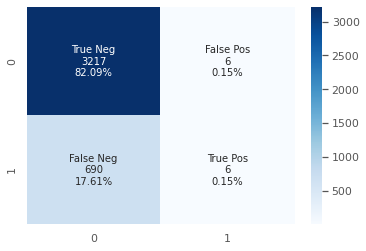

In [341]:
from sklearn.linear_model import LogisticRegression
weights={1:0.0,1:2.0}
classifier = LogisticRegression(random_state=0, max_iter=10000)
classifier.fit(X_train, np.ravel(y_train))
y_pred = classifier.predict(X_test)
printresult(y_pred,y_test)

Mean squared error: 0.24
Coefficient of determination: -0.67
Accuracy score: 0.756571
F score: 0.750481
Confusion Matrix: 


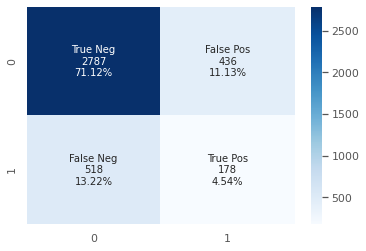

In [342]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, np.ravel(y_train))
y_pred = classifier.predict(X_test)
printresult(y_pred,y_test)


#Random Forest

Mean squared error: 0.18
Coefficient of determination: -0.21
Accuracy score: 0.822914
F score: 0.748633
Confusion Matrix: 


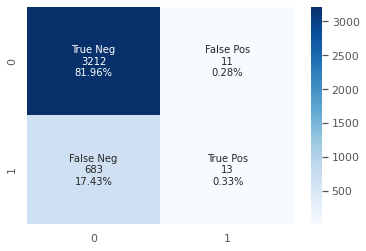

In [343]:
from sklearn.ensemble import RandomForestClassifier
final_classifier = RandomForestClassifier(n_estimators = 500, random_state = 0)
"""
classifier.fit(X_train, np.ravel(y_train))
# Get numerical feature importances
feature_list = list(bank_dataset_conc.columns)
importances = list(classifier.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
nonImportantFeatures =[]
for i in feature_importances:
  #print("Feature: {0:<30}  : Importance: {1}".format(i[0], i[1]))
  if(i[1]<=0.01):
    nonImportantFeatures.append(i[0])

temp_bank_data = bank_dataset_conc.drop(nonImportantFeatures,axis=1)

X = np.array(temp_bank_data)
Y = np.array(output_dataset)
Y = Y.reshape(-1,1)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

"""
final_classifier.fit(X_train, np.ravel(y_train))
y_pred = final_classifier.predict(X_test)
printresult(y_pred,y_test)


Mean squared error: 0.18
Coefficient of determination: -0.22
Accuracy score: 0.822404
F score: 0.742259
Confusion Matrix: 


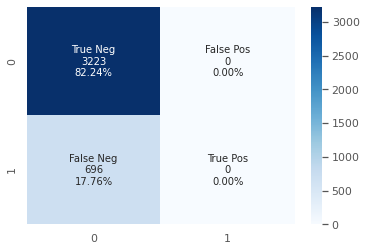

In [344]:
from sklearn import svm
classifier=svm.SVC()
classifier.fit(X_train, np.ravel(y_train))
y_pred = classifier.predict(X_test)
printresult(y_pred,y_test)

Mean squared error: 0.18
Coefficient of determination: -0.24
Accuracy score: 0.818321
F score: 0.743496
Confusion Matrix: 


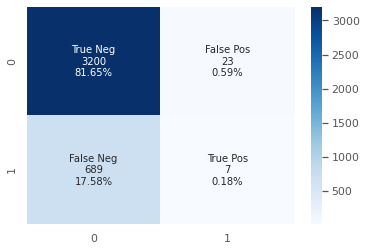

In [345]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=15)
classifier.fit(X_train, np.ravel(y_train))
y_pred = classifier.predict(X_test)
printresult(y_pred,y_test)

Result Analysis


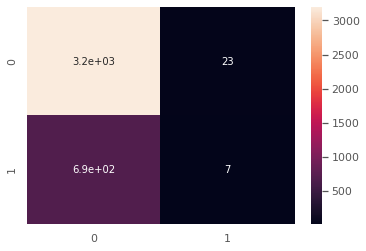

In [346]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [347]:
unique_elements, counts_elements = np.unique(Y, return_counts=True)

In [348]:
print(unique_elements)
print(counts_elements)

[0. 1.]
[15951  3644]


In [349]:
unique_elements, counts_elements = np.unique(y_test, return_counts=True)

In [350]:
print(unique_elements)
print(counts_elements)


[0. 1.]
[3223  696]


# Predicting the Evaluation Data

In [351]:
#import dataset
eval_bank_dataset = pd.read_csv('Evaluation_Data_0611_Nv.csv',index_col = 'cust_id')
eval_bank_dataset.head()


,count_accts,cm_age,flag_top_ed_spender,flag_cust_fee_paid_6m,pre6m_cust_spend,pre6m_cust_roc_cnt,pre6m_cust_non_disc_amt,pre6m_cust_non_disc_cnt,pre6m_cust_disc_amt,pre6m_cust_disc_cnt,pre6m_cust_outbound_amt,pre6m_cust_online_amt,pre6m_cust_online_cnt,pre6m_cust_travel_amt,pre6m_cust_travel_cnt,pre6m_cust_retail_amt,pre6m_cust_retail_cnt,pre6m_cust_myca_active,pre6m_cust_mob_logins,pre6m_total_mc_trs,acq_sub_chn,acq_type_grp,fee_type_grp,Cust_tenure,pre6m_spend_active_ind,highly_utilized_ind,min_pay_ind,paid_in_full_ind,sum_total_line_amt,direct_debit_ind,referrals,spillover,self_accts,Customer Low Quality indicator,cdss_most_rcnt_prob,cust_max_credit_12m_amt,cust_max_remit_12m_amt,cbr_3_score,cnsumr_chrg_actv_cust_cnt,cnsumr_chrg_avg_credit_12m_amt,cnsumr_lend_actv_cust_cnt,cnsumr_lend_tot_util_ratio,sow_revol_avg_paydown_pct,sow_tot_annual_ext_pmt_amt,sow_tot_revol_bal_amt,sow_tot_revol_cnt,sow_tot_trans_bal_amt,sow_tot_trans_cnt
cust_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
569986,1,37,0.0,0,"9,868",760,777,174,"9,091",586,"1,705","2,286",280,"3,219",268,"2,668",240,5,9,474,Paid Search,external,no_fee,10.0,1.0,1.0,0.0,0.0,"46,000",0.0,0.0,0.0,0.0,0.0,0.048,"1,880","1,875",833.0,0.0,-,1.0,1.055513,0.0,-,-,0.0,-,0.0
569987,2,33,0.0,0,-,0,-,0,-,0,-,-,0,-,0,-,0,0,0,(0),MGM,external,reduced_fee,1.0,0.0,0.0,0.0,0.0,"5,133",0.0,0.0,0.0,0.0,0.0,NaN,-,-,NaN,NaN,-,NaN,NaN,NaN,-,-,NaN,-,NaN
569988,2,40,1.0,0,"2,401",302,"1,045",166,"1,357",136,289,483,96,220,18,986,176,5,5,2,MGM,spillover,no_fee,10.0,1.0,0.0,0.0,1.0,"69,600",0.0,0.0,0.0,0.0,0.0,0.000,739,618,1251.0,0.0,43,2.0,0.029297,0.0,-,-,0.0,-,0.0
569989,1,34,1.0,1,"9,836",856,829,190,"9,007",666,"2,104","2,545",292,"2,109",254,"1,921",274,6,20,170,MGM,external,reduced_fee,14.0,1.0,0.0,0.0,0.0,-,1.0,0.0,0.0,0.0,0.0,0.000,"1,864","1,851",1004.0,1.0,829,0.0,0.000000,0.0,-,-,0.0,-,0.0
569990,1,28,0.0,0,"2,351",260,584,90,"1,767",170,63,282,56,127,26,"1,878",124,3,3,(9),MGM,external,no_fee,7.0,1.0,0.0,0.0,1.0,"9,600",0.0,0.0,0.0,0.0,0.0,0.000,752,731,1293.0,0.0,-,1.0,0.200658,0.0,-,-,0.0,-,0.0


In [352]:
#the columns which need to be converted to float
eval_bank_float_dataset = eval_bank_dataset[[i for i in eval_bank_dataset.columns if i not in ['acq_sub_chn','acq_type_grp','fee_type_grp']]]
eval_bank_string_dataset = eval_bank_dataset[[i for i in eval_bank_dataset.columns if i in ['acq_type_grp','fee_type_grp']]]

In [353]:
eval_bank_float_dataset = eval_bank_float_dataset.replace({',':''},regex=True)
eval_bank_float_dataset = eval_bank_float_dataset.replace({'-':''},regex=True)
eval_bank_float_dataset = eval_bank_float_dataset.replace({' ':''},regex=True)
eval_bank_float_dataset = eval_bank_float_dataset.replace({'\(':''},regex=True)
eval_bank_float_dataset = eval_bank_float_dataset.replace({'\)':''},regex=True)
eval_bank_float_dataset = eval_bank_float_dataset.apply(pd.to_numeric)
eval_bank_float_dataset.head()

,count_accts,cm_age,flag_top_ed_spender,flag_cust_fee_paid_6m,pre6m_cust_spend,pre6m_cust_roc_cnt,pre6m_cust_non_disc_amt,pre6m_cust_non_disc_cnt,pre6m_cust_disc_amt,pre6m_cust_disc_cnt,pre6m_cust_outbound_amt,pre6m_cust_online_amt,pre6m_cust_online_cnt,pre6m_cust_travel_amt,pre6m_cust_travel_cnt,pre6m_cust_retail_amt,pre6m_cust_retail_cnt,pre6m_cust_myca_active,pre6m_cust_mob_logins,pre6m_total_mc_trs,Cust_tenure,pre6m_spend_active_ind,highly_utilized_ind,min_pay_ind,paid_in_full_ind,sum_total_line_amt,direct_debit_ind,referrals,spillover,self_accts,Customer Low Quality indicator,cdss_most_rcnt_prob,cust_max_credit_12m_amt,cust_max_remit_12m_amt,cbr_3_score,cnsumr_chrg_actv_cust_cnt,cnsumr_chrg_avg_credit_12m_amt,cnsumr_lend_actv_cust_cnt,cnsumr_lend_tot_util_ratio,sow_revol_avg_paydown_pct,sow_tot_annual_ext_pmt_amt,sow_tot_revol_bal_amt,sow_tot_revol_cnt,sow_tot_trans_bal_amt,sow_tot_trans_cnt
cust_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
569986,1,37,0.0,0,9868.0,760,777.0,174,9091.0,586,1705.0,2286.0,280,3219.0,268,2668.0,240,5,9,474,10.0,1.0,1.0,0.0,0.0,46000.0,0.0,0.0,0.0,0.0,0.0,0.048,1880.0,1875.0,833.0,0.0,NaN,1.0,1.055513,0.0,NaN,NaN,0.0,NaN,0.0
569987,2,33,0.0,0,NaN,0,NaN,0,NaN,0,NaN,NaN,0,NaN,0,NaN,0,0,0,0,1.0,0.0,0.0,0.0,0.0,5133.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
569988,2,40,1.0,0,2401.0,302,1045.0,166,1357.0,136,289.0,483.0,96,220.0,18,986.0,176,5,5,2,10.0,1.0,0.0,0.0,1.0,69600.0,0.0,0.0,0.0,0.0,0.0,0.000,739.0,618.0,1251.0,0.0,43.0,2.0,0.029297,0.0,NaN,NaN,0.0,NaN,0.0
569989,1,34,1.0,1,9836.0,856,829.0,190,9007.0,666,2104.0,2545.0,292,2109.0,254,1921.0,274,6,20,170,14.0,1.0,0.0,0.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,0.000,1864.0,1851.0,1004.0,1.0,829.0,0.0,0.000000,0.0,NaN,NaN,0.0,NaN,0.0
569990,1,28,0.0,0,2351.0,260,584.0,90,1767.0,170,63.0,282.0,56,127.0,26,1878.0,124,3,3,9,7.0,1.0,0.0,0.0,1.0,9600.0,0.0,0.0,0.0,0.0,0.0,0.000,752.0,731.0,1293.0,0.0,NaN,1.0,0.200658,0.0,NaN,NaN,0.0,NaN,0.0


In [354]:
eval_bank_float_dataset = eval_bank_float_dataset.drop(high_corr_columns,axis=1)

In [355]:
eval_freq_imputer = SimpleImputer(strategy = 'most_frequent')
eval_knn_imputer = KNNImputer(n_neighbors=2, weights="uniform")
eval_bank_float_dataset_num = eval_knn_imputer.fit_transform(eval_bank_float_dataset)
eval_bank_string_dataset_num = eval_freq_imputer.fit_transform(eval_bank_string_dataset)

eval_bank_float_dataset = pd.DataFrame(data=eval_bank_float_dataset_num, index=eval_bank_float_dataset.index.tolist(), columns=eval_bank_float_dataset.columns)
eval_bank_string_dataset = pd.DataFrame(data=eval_bank_string_dataset_num, index=eval_bank_string_dataset.index.tolist(), columns=eval_bank_string_dataset.columns)

In [356]:
eval_bank_string_dataset = pd.get_dummies(eval_bank_string_dataset, prefix_sep= '_', columns=['acq_type_grp','fee_type_grp'], drop_first = True)

In [357]:
#Feature scaling
#eval_scaler = preprocessing.MinMaxScaler()
eval_scaled_df = scaler.transform(eval_bank_float_dataset)
eval_bank_float_dataset = pd.DataFrame(data=eval_scaled_df, index=eval_bank_float_dataset.index.tolist(), columns=eval_bank_float_dataset.columns)

In [358]:
#join both the dataset
eval_bank_dataset_conc = pd.concat([eval_bank_float_dataset, eval_bank_string_dataset], axis=1, sort=False)

In [359]:
#Considering only important features
eval_impo_features_dataset = eval_bank_dataset_conc[impo_features]

In [360]:
eval_X = np.array(eval_impo_features_dataset)

In [361]:
eval_y = final_classifier.predict(eval_X)

In [362]:
unique_eval_elems, count_eval_elems = np.unique(eval_y, return_counts=True)
print(unique_eval_elems, count_eval_elems)

[0. 1.] [4971   29]


In [363]:
final_df = eval_bank_dataset.iloc[:,0:0]
final_df["output"] = list(eval_y)

In [364]:
final_df.to_csv("Submission_final.csv" , header = False)